# Case study on Supervised learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Read the dataset to the python environment.


In [3]:
df=pd.read_excel('C:\\Users\\USER\\Downloads\\iris (1).xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [7]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Filling the missing values

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SL', ylabel='Density'>

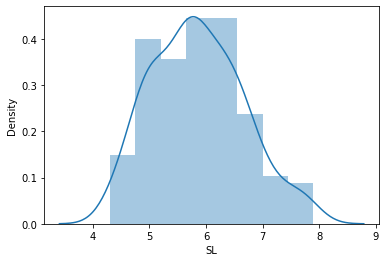

In [11]:
sns.distplot(df["SL"])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SW', ylabel='Density'>

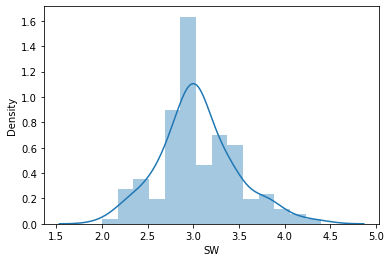

In [12]:
sns.distplot(df["SW"])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PL', ylabel='Density'>

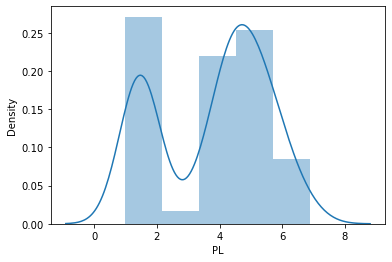

In [13]:
sns.distplot(df.PL)

In [14]:
#Filling the missing values with median
df['SL'].fillna(round(df['SL'].median(),1),inplace=True)
df['SW'].fillna(round(df['SW'].median(),1),inplace=True)
df['PL'].fillna(round(df['PL'].median(),1),inplace=True)
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,4.3,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Checking for outliers

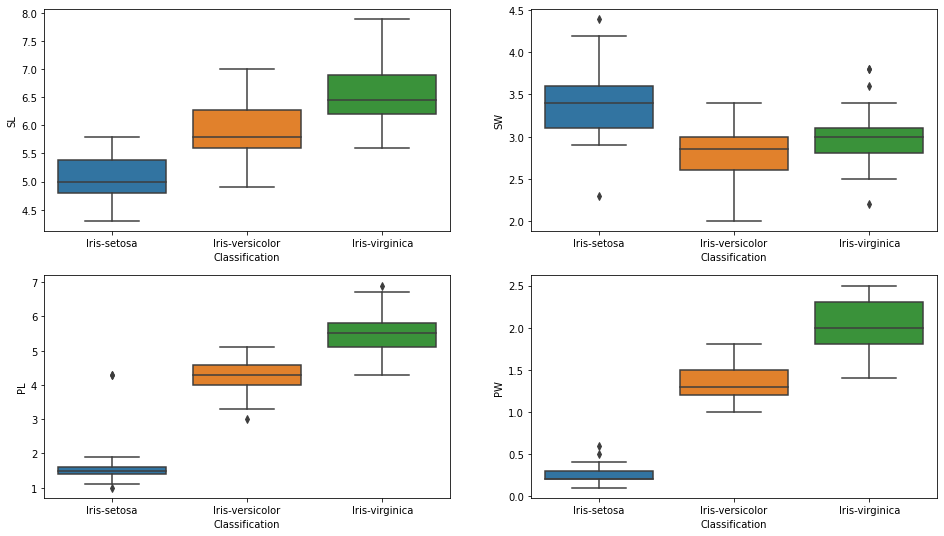

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="SL", x= "Classification", data=df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="SW", x= "Classification", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="PL", x= "Classification", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="PW", x= "Classification", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

# Removing outliers

In [24]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
df['SW']=np.where(df['SW']>upp_lim,upp_lim,np.where(df['SW']<low_lim,low_lim,df['SW']))

<AxesSubplot:>

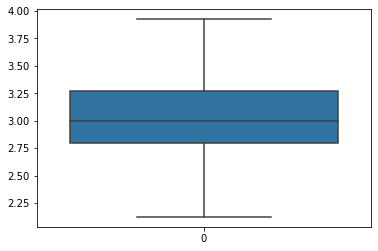

In [27]:
sns.boxplot( data=df['SW'])

# Encoding data

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Classification']= le.fit_transform(df['Classification'])
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,4.3,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
X = df.drop('Classification',axis=1)
y = df['Classification']

from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.03751087540302005
R squared value is  0.9463278412357423


# Scaling - MinMax Scaler

In [30]:
X = df.drop('Classification',axis=1)

min_max = preprocessing.MinMaxScaler(feature_range=(0,2))
X = min_max.fit_transform(X)

pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.862963,1.018333,0.941695,0.915556
std,0.449204,0.447693,0.586030,0.635967
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.750000,0.203390,0.166667
50%,0.833333,0.972222,1.118644,1.000000
75%,1.166667,1.277778,1.389831,1.416667
max,2.000000,2.000000,2.000000,2.000000


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.0375108754030201
R squared value is  0.9463278412357423


# Logistic Regression Model

In [33]:
log_reg = linear_model.LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = log_reg.fit(x_train, y_train)
pred  = model.predict(x_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('accuracy is: ',round(accuracy_score(y_test,pred),4))
print('Precision is: ',round(precision_score(y_test,pred,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,pred,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,pred,average='micro'),4))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('Classification',axis=1)
y = df['Classification']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

k_val = np.arange(3,15)
acc_val = []
for k in k_val:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(x_train, y_train)
    pred  = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred)
    acc_val.append(acc)

Text(0, 0.5, 'Accuracy')

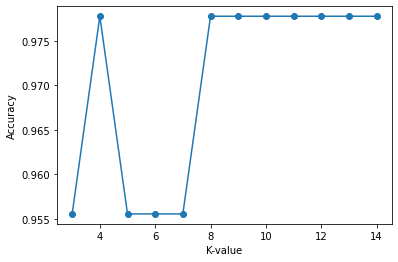

In [36]:
plt.plot(k_val,acc_val,'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')

In [38]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski')
classifier.fit(x_train, y_train)
pred  = classifier.predict(x_test)
print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  0.9777777777777777
Precision is:  0.9777777777777777
recall score is:  0.9777777777777777
f1 score is:  0.9777777777777777


# Decision Tree Classifier Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Classification',axis=1)
y = df['Classification']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
pred  = dt_model.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))


accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


# SVM Model

In [41]:
from sklearn.svm import SVC

X = df.drop('Classification',axis=1)
y = df['Classification']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
pred  = dt_model.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


# Random Forest Algorithm

In [42]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Classification',axis=1)
y = df['Classification']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


In [43]:
# From the analysis, it is clear that Decision tree And Random Forest models have the best accuracy